#### Verify tug oil capacity attribution using ATB ship track data
The purpose of this notebook is to compare the AIS pings for ATB traffic vs. barge traffic in order to validate our methodology for using ATB traffic to estimate the number of ship tracks that we would expect for the transport of oil cargo by tugs that were identified to load or unload oil cargo in the U.S. Dept. of Ecology oil transfer data for 2018.

Barge traffic plotted here is for the selected barge traffic used in the origin-destination analysis.  This barge traffic is 67% of all barge traffic in the comprehensive dataset and represents tugs that docked at a known oil transfer terminal during 2018.  Although this data doesn't specify whether the tugs docked to bunker or to load/unload cargo, it pre-selects barge traffic that could be identified by affiliation as oil cargo barges.    

In [49]:
import sys
import yaml
import pathlib
import numpy
import pandas
import matplotlib.pyplot as plt

In [50]:
input_file = '/Users/rmueller/Projects/MIDOSS/analysis-rachael/notebooks/monte_carlo/data/Origin_Destination_Analysis.xlsx'
barge_df = pandas.read_excel(
    input_file,
    sheet_name='Frequency of AIS Pings', 
    usecols='B,E,H,K,N,Q,S,T,U',
    headers=1
)

# atb fit
non_nan = barge_df['Number of vessel tracks']>0
atb_coef= numpy.polyfit(
    barge_df['Number of vessel tracks'][non_nan], 
    barge_df['Median distance traveled (km)'][non_nan], 
    1
)

# barge fit
non_nan = barge_df['Number of vessel tracks.2']>0
barge_coef= numpy.polyfit(
    barge_df['Number of vessel tracks.2'][non_nan], 
    barge_df['Median distance traveled (km).2'][non_nan], 
    1
)

test_length = range(0,200000,1000)

atb_fit = ( 
    atb_coef[1] + 
    atb_coef[0]*test_length 
)
barge_fit = ( 
    barge_coef[1] + 
    barge_coef[0]*test_length 
)

In [51]:
barge_df["Median distance travelled by ATBs"][0]

6321.4563150000004

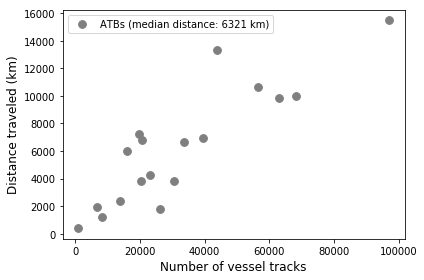

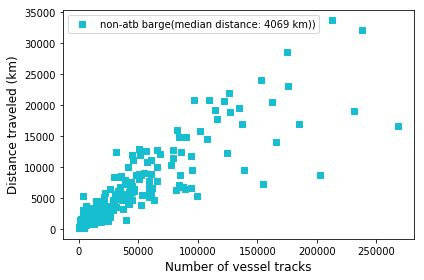

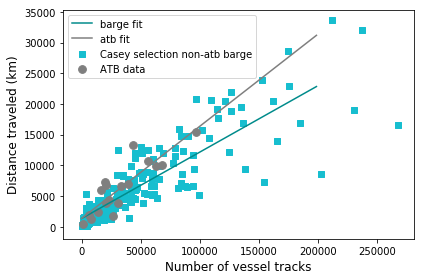

In [52]:
figatb = plt.figure()
ax1 = figatb.add_subplot(111)
ax1.scatter(
    barge_df['Number of vessel tracks'],
    barge_df['Median distance traveled (km)'],
    60,
    label=f'ATBs (median distance: {barge_df["Median distance travelled by ATBs"][0]:.0f} km)',
    color='tab:grey'
)
plt.xlabel('Number of vessel tracks',fontsize=12)
plt.ylabel('Distance traveled (km)',fontsize=12)
plt.tight_layout()
ax1.legend()
#plt.savefig('ATB_cargo_ais.png')
plt.show()

figbarge = plt.figure()
ax2 = figbarge.add_subplot(111)
ax2.scatter(
    barge_df['Number of vessel tracks.2'],
    barge_df['Median distance traveled (km).2'],
    30,
    label=f'non-atb barge(median distance: {barge_df["Median distance travelled by non-ATB tank barges in subsample"][0]:.0f} km))',
    color='tab:cyan',
    marker='s'
)
plt.xlabel('Number of vessel tracks',fontsize=12)
plt.ylabel('Distance traveled (km)',fontsize=12)
plt.tight_layout()
ax2.legend()
#plt.savefig('ATB_cargo_ais.png')
plt.show()

figall = plt.figure()
ax3 = figall.add_subplot(111)

ax3.scatter(
    barge_df['Number of vessel tracks.2'],
    barge_df['Median distance traveled (km).2'],
    30,
    label='Casey selection non-atb barge',
    color='tab:cyan',
    marker='s'
)

ax3.scatter(
    barge_df['Number of vessel tracks'],
    barge_df['Median distance traveled (km)'],
    60,
    label='ATB data',
    color='tab:grey'
)

ax3.plot(test_length, barge_fit, c='darkcyan', label='barge fit')
ax3.plot(test_length, atb_fit, c='tab:grey', label='atb fit')

plt.xlabel('Number of vessel tracks',fontsize=12)
plt.ylabel('Distance traveled (km)',fontsize=12)
plt.tight_layout()
ax3.legend()
#plt.savefig('ATB_cargo_ais.png')
plt.show()

In [38]:
barge_df

,Number of vessel tracks,Median distance traveled (km),Number of vessel tracks.1,Median distance traveled (km).1,Number of vessel tracks.2,Median distance traveled (km).2,Average median distance travelled by ATBs,Average median distance travelled by non-ATB tank barges,Average median distance travelled by non-ATB tank barges in Casey's subsample
0,20420.0,3830.669480,3610,678.889380,19856.0,4069.288640,6253.94817,4640.254834,6060.733908
1,30690.0,3847.666680,804,218.905080,42838.0,7449.056982,NaN,NaN,NaN
2,20609.0,6830.523306,19856,4069.288640,3133.0,557.413961,NaN,NaN,NaN
3,39378.0,6954.745470,7863,1181.958297,14324.0,3741.400152,NaN,NaN,NaN
4,26245.0,1807.178210,2062,342.236326,12830.0,2969.426520,NaN,NaN,NaN
5,33730.0,6640.931050,3345,579.668430,30865.0,4837.625775,NaN,NaN,NaN
6,43829.0,13328.311240,42838,7449.056982,36864.0,4740.636672,NaN,NaN,NaN
7,8181.0,1199.220066,952,233.661736,52908.0,5485.818888,NaN,NaN,NaN
8,16114.0,6001.981580,645,172.419465,19150.0,2714.838050,NaN,NaN,NaN
9,936.0,387.393552,3133,557.413961,134830.0,19533.496250,NaN,NaN,NaN
